## Final Computer Science Project - Hot in Here

- Import libraries (graphics, panda, geopanda)

- Input data that has the Max and Min temperature per state for the years 1995-2023

- Using graphics, prompt the user to a map of the US. 
- The user clicks the center of the state they want to known the temperature information of. 
    - Generate a plot that will have Max & Min temp 
    - 4 maps with the temp (Max 1895-2023/ Min 1895-2023) all USA

- Ask the user if they want to visualize a graph of the temperature data for a specific year. 


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import graphics as gp
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import geopandas as gpd
import seaborn as sns
import os

In [34]:
# Load the CSV file with whitespace as the separator and specify data types
df = pd.read_csv('Max_Min.csv', sep=r'\s+', header=None, dtype={0: str})

# Assign column names if you have them (customize these names as needed)
df.columns = [f'Column_{i+1}' for i in range(df.shape[1])]

# Assign custom column names
df.columns = ['Regions', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Drop rows where 'Regions' ends with '2024'
df = df[~df['Regions'].str.endswith('2024')]

# Separate the regions into State, Element Code, and Year.
df['State'] = df['Regions'].str[:3]
df['Element Code'] = df['Regions'].str[3:6]
df['Year'] = df['Regions'].str[6:10]

# Convert 'Year' to numeric (handle non-numeric values gracefully)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to integers (non-convertible values become NaN)

# Optional: Drop rows with invalid 'Year' (NaN)
df = df.dropna(subset=['Year'])

#Give the cordinate of each state to its number
state_code_dict = {
    '001': 'Alabama', '002': 'Arizona', '003': 'Arkansas', '004': 'California',
    '005': 'Colorado', '006': 'Connecticut', '007': 'Delaware', '008': 'Florida',
    '009': 'Georgia', '010': 'Idaho', '011': 'Illinois', '012': 'Indiana',
    '013': 'Iowa', '014': 'Kansas', '015': 'Kentucky', '016': 'Louisiana',
    '017': 'Maine', '018': 'Maryland', '019': 'Massachusetts', '020': 'Michigan',
    '021': 'Minnesota', '022': 'Mississippi', '023': 'Missouri', '024': 'Montana',
    '025': 'Nebraska', '026': 'Nevada', '027': 'New Hampshire', '028': 'New Jersey',
    '029': 'New Mexico', '030': 'New York', '031': 'North Carolina', '032': 'North Dakota',
    '033': 'Ohio', '034': 'Oklahoma', '035': 'Oregon', '036': 'Pennsylvania',
    '037': 'Rhode Island', '038': 'South Carolina', '039': 'South Dakota', '040': 'Tennessee',
    '041': 'Texas', '042': 'Utah', '043': 'Vermont', '044': 'Virginia', '045': 'Washington',
    '046': 'West Virginia', '047': 'Wisconsin', '048': 'Wyoming', '050': 'Alaska'}


#Give the cordinate for Max temp for that state to the Min temp to that state.
element_code = {'027': 'Max', '028':'Min'}

#Making the new colunm. 
df['State'] = df['State'].map(state_code_dict)
df['Element Code'] = df['Element Code'].map(element_code)

# List of columns that contain the monthly temperature data
month_columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define a function to calculate the value based on Element Code
def calculate_temperature(row):
    if row['Element Code'] == 'Max':
        return row[month_columns].max()  # Get the highest value for Max
    elif row['Element Code'] == 'Min':
        return row[month_columns].min()  # Get the lowest value for Min
    else:
        return row['temperature_average']  # If neither Max nor Min, keep the existing value

# Apply the function to the DataFrame
df['temperature_average'] = df.apply(calculate_temperature, axis=1)

In [37]:
print(df)

          Regions  January  February  March  April   May  June  July  August  \
0      0010271895     52.7      48.1   66.5   75.7  80.6  88.4  89.6    89.7   
1      0010271896     53.0      59.0   63.9   80.6  87.8  87.9  91.6    94.0   
2      0010271897     52.1      61.0   69.9   74.8  82.2  94.0  92.8    89.5   
3      0010271898     59.1      58.0   69.9   71.0  88.0  92.7  90.5    88.4   
4      0010271899     54.4      51.4   67.8   72.6  88.6  92.3  91.9    92.0   
...           ...      ...       ...    ...    ...   ...   ...   ...     ...   
12742  0500282019      1.0       7.7   19.2   20.0  34.7  44.5  49.5    43.6   
12743  0500282020    -12.6      -6.7    3.2   19.5  33.7  42.1  45.4    43.9   
12744  0500282021      4.6      -6.6   -0.2   14.0  31.4  42.5  46.5    42.8   
12745  0500282022     -4.0       1.6    8.7   15.4  30.8  42.6  45.5    43.6   
12746  0500282023      5.1      -1.5    4.5    7.3  31.9  42.0  48.2    46.5   

       September  October  November  De

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12648 entries, 0 to 12746
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Regions              12648 non-null  object 
 1   January              12648 non-null  float64
 2   February             12648 non-null  float64
 3   March                12648 non-null  float64
 4   April                12648 non-null  float64
 5   May                  12648 non-null  float64
 6   June                 12648 non-null  float64
 7   July                 12648 non-null  float64
 8   August               12648 non-null  float64
 9   September            12648 non-null  float64
 10  October              12648 non-null  float64
 11  November             12648 non-null  float64
 12  December             12648 non-null  float64
 13  State                12582 non-null  object 
 14  Element Code         12648 non-null  object 
 15  Year                 12648 non-null  int6

In [41]:
# Using graphics, prompt the user to a map of the US. 
#Create a graphics window 
def USA_map(win):
    #win = gp.GraphWin ("USA Map", 640, 480)
    #Load the image 
    image = gp.Image(gp.Point(320,240), "USA2.png")

    #Draw the image in window
    image.draw(win)

    #Keep the window open until the user clicks
    #win.getMouse ()
   # win.close()
    #return win 

This chunk of code was used to obtain the coordiantes of each state capital in the map.

def main():
    win = gp.GraphWin ("USA Map", 640, 480)
    map = USA_map(win)
    print(map)
    list_states = [
    'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
    'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
    'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Alaska']
    pt_dict = {}
    for state in list_states:
        p1 = win.getMouse()
        p1x = p1.getX()
        p1y = p1.getY()
        location =[p1x, p1y]
        pt_dict[state] = location
        print(pt_dict)
    r2 = gp.Cirlce(gp.Point(p1x,p1y))
    print(r2)
    USA_map()


main()

In [44]:
coordinate_USA = {'Alabama': [441.0, 264.0], 'Arizona': [150.0, 257.0], 'Arkansas': [367.0, 237.0], 'California': [58.0, 174.0], 'Colorado': [230.0, 175.0], 'Connecticut': [564.0, 114.0], 'Delaware': [545.0, 156.0], 'Florida': [470.0, 293.0], 'Georgia': [462.0, 246.0], 'Idaho': [122.0, 108.0], 'Illinois': [399.0, 175.0], 'Indiana': [429.0, 165.0], 'Iowa': [349.0, 148.0], 'Kansas': [328.0, 182.0], 'Kentucky': [449.0, 190.0], 'Louisiana': [385.0, 301.0], 'Maine': [582.0, 72.0], 'Maryland': [529.0, 158.0], 'Massachusetts': [578.0, 105.0], 'Michigan': [442.0, 126.0], 'Minnesota': [353.0, 103.0], 'Mississippi': [400.0, 276.0], 'Missouri': [366.0, 192.0], 'Montana': [168.0, 78.0], 'Nebraska': [314.0, 155.0], 'Nevada': [79.0, 164.0], 'New Hampshire': [572.0, 90.0], 'New Jersey': [549.0, 139.0], 'New Mexico': [218.0, 234.0], 'New York': [544.0, 102.0], 'North Carolina': [522.0, 206.0], 'North Dakota': [273.0, 77.0], 'Ohio': [466.0, 156.0], 'Oklahoma': [312.0, 234.0], 'Oregon': [60.0, 86.0], 'Pennsylvania': [528.0, 137.0], 'Rhode Island': [574.0, 114.0], 'South Carolina': [498.0, 232.0], 'South Dakota': [283.0, 112.0], 'Tennessee': [430.0, 218.0], 'Texas': [309.0, 304.0], 'Utah': [159.0, 157.0], 'Vermont': [555.0, 81.0], 'Virginia': [526.0, 181.0], 'Washington': [65.0, 56.0], 'West Virginia': [485.0, 176.0], 'Wisconsin': [393.0, 121.0], 'Wyoming': [231.0, 152.0], 'Alaska': [165.0, 424.0]}

In [46]:
def coordinate_input(win):
    '''
    Ask for the input of the user
    Get the cordinates that the user input and get into the library that made for the capitals of the states
    (use graphics for that )
    
    '''
    p1 = win.getMouse()
    p1x = p1.getX()
    p1y = p1.getY()
    location =(p1x, p1y)
    
    return location

In [48]:
# Function to calculate the Euclidean distance between two points
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Define the wiggle room radius (in pixels)
wiggle_radius = 30  # Adjust this value as needed

In [50]:
# Function to find the state based on the click coordinates
def find_state_by_click(x_click, y_click):
    for state, coordinates in coordinate_USA.items():
        x_state, y_state = coordinates
        distance = calculate_distance(x_click, y_click, x_state, y_state)
        if distance <= wiggle_radius:
            return state, coordinates
    return None, None  # Return None if no state is found

In [52]:
# Function to ask for the input of the user
def coordinate_input(win):
    '''
    Ask for the input of the user
    Get the coordinates that the user clicked and use the library for the capitals of the states
    (use graphics for that)
    '''
    p1 = win.getMouse()  # Wait for the user to click
    p1x = p1.getX()  # Get the x-coordinate of the click
    p1y = p1.getY()  # Get the y-coordinate of the click
    location = (p1x, p1y)
    
    # Return the location of the mouse click
    return location

In [54]:
def split (df, state_name):
    return df[df['State'] == state_name]

In [56]:
def plt_state(choose_data, state, degree=5):
    '''
    Get the state that was selected by the user
    Define X and Y for the plot
    Plot the state with polynomial regression lines, one for 'Max' and one for 'Min'
    '''
    # Filter the data for 'Max' and 'Min' temperatures
    max_temp_data = choose_data[choose_data['Element Code'] == 'Max']
    min_temp_data = choose_data[choose_data['Element Code'] == 'Min']

    # Define X and Y for the 'Max' temperature
    y_max = max_temp_data['temperature_average'].values
    X_max = max_temp_data['Year'].values.reshape(-1, 1)

    # Define X and Y for the 'Min' temperature
    y_min = min_temp_data['temperature_average'].values
    X_min = min_temp_data['Year'].values.reshape(-1, 1)
    
    # Fit polynomial regression for 'Max' temperature
    poly_max = PolynomialFeatures(degree=degree)
    X_max_poly = poly_max.fit_transform(X_max)
    poly_reg_max = LinearRegression()
    poly_reg_max.fit(X_max_poly, y_max)
    
    # Fit polynomial regression for 'Min' temperature
    poly_min = PolynomialFeatures(degree=degree)
    X_min_poly = poly_min.fit_transform(X_min)
    poly_reg_min = LinearRegression()
    poly_reg_min.fit(X_min_poly, y_min)

    # Generate a smooth range of years for plotting the curves
    year_range = np.linspace(X_max.min(), X_max.max(), 500).reshape(-1, 1)
    y_max_smooth = poly_reg_max.predict(poly_max.transform(year_range))
    y_min_smooth = poly_reg_min.predict(poly_min.transform(year_range))

    y_avg_smooth = (y_max_smooth + y_min_smooth) / 2
    
    # Plot scatter points for 'Max' and 'Min' temperatures
    plt.scatter(X_max, y_max, color='#C24641', alpha=0.5, label='Max Temperature Data')
    plt.scatter(X_min, y_min, color='#81D8D0', alpha=0.5, label='Min Temperature Data')

    # Plot the polynomial regression lines for 'Max' and 'Min'
    plt.plot(year_range, y_max_smooth, color='#990012', label=f'Max Temperature')
    plt.plot(year_range, y_min_smooth, color='#004225', label=f'Min Temperature')

    
    plt.plot(year_range, y_avg_smooth, color='purple', label='Average Temperature Fit', linestyle='--')
    # Title, labels, and grid
    plt.title(f'Temperature Trends Over Time in {state}')
    plt.ylabel('Temperature Range (ºF)')
    plt.xlabel('Year')
    plt.grid(True)

    # Display the legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()

    return

In [58]:
def temp_plot(old, new):
    # Convert 'Year' column to numeric type, coercing errors to NaN
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    # Filter the data by 'Element Code' for Max and Min temperatures
    max_temp_data = df[df['Element Code'] == 'Max']
    min_temp_data = df[df['Element Code'] == 'Min']

    # Filter for the specific years (old and new)
    old_min = min_temp_data[min_temp_data['Year'] == old]
    new_min = min_temp_data[min_temp_data['Year'] == new]
    old_max = max_temp_data[max_temp_data['Year'] == old]
    new_max = max_temp_data[max_temp_data['Year'] == new]
    
    # Load the shapefile
    #shapefile_path = os.getcwd()  # get the directory that has this jupyter notebook
    shapefile_path = "/Users/pedrodarochaborin/Downloads/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp"
    gdf = gpd.read_file(shapefile_path)
    #gdf = gpd.read_file('ne_110m_admin_1_states_provinces.shp') 
    
    # Merge the temperature data with the shapefile for both years and remove Alaska
    merged_old_min = gdf.merge(old_min[['State', 'temperature_average']], left_on='name', right_on='State', how='left')
    merged_new_min = gdf.merge(new_min[['State', 'temperature_average']], left_on='name', right_on='State', how='left')
    merged_old_max = gdf.merge(old_max[['State', 'temperature_average']], left_on='name', right_on='State', how='left')
    merged_new_max = gdf.merge(new_max[['State', 'temperature_average']], left_on='name', right_on='State', how='left')

    # Remove Alaska from all merged dataframes
    merged_old_min = merged_old_min[merged_old_min['name'] != 'Alaska']
    merged_new_min = merged_new_min[merged_new_min['name'] != 'Alaska']
    merged_old_max = merged_old_max[merged_old_max['name'] != 'Alaska']
    merged_new_max = merged_new_max[merged_new_max['name'] != 'Alaska']
    
    # Set color maps for min and max temperature data
    cmap_min = sns.color_palette("Blues", as_cmap=True)
    cmap_max = sns.color_palette("Reds", as_cmap=True)
    
    # Standardize the color scales:
    min_scale = (-10, 30)  # Min temperature color scale range
    max_scale = (78, 110)  # Max temperature color scale range
    
    # Create subplots for min and max temperatures of both years
    fig, axs = plt.subplots(2, 2, figsize=(30, 14))  # 2x2 grid of subplots
    
    # Plot min temperature maps with a standard color scale
    merged_old_min.plot(
        column='temperature_average', 
        cmap=cmap_min, 
        linewidth=0.8, 
        ax=axs[0, 0], 
        edgecolor='1', 
        legend=True,
        vmin=min_scale[0],  # Standardize min temperature color scale
        vmax=min_scale[1]   # Standardize min temperature color scale
    )
    axs[0, 0].set_title(f'Min Temperature Map of the USA ({old})', fontsize=30)
    
    merged_new_min.plot(
        column='temperature_average', 
        cmap=cmap_min, 
        linewidth=0.8, 
        ax=axs[0, 1], 
        edgecolor='1', 
        legend=True,
        vmin=min_scale[0],  # Standardize min temperature color scale
        vmax=min_scale[1]   # Standardize min temperature color scale
    )
    axs[0, 1].set_title(f'Min Temperature Map of the USA ({new})', fontsize=30)
    
    # Plot max temperature maps with a standard color scale
    merged_old_max.plot(
        column='temperature_average', 
        cmap=cmap_max, 
        linewidth=0.8, 
        ax=axs[1, 0], 
        edgecolor='1', 
        legend=True,
        vmin=max_scale[0],  # Standardize max temperature color scale
        vmax=max_scale[1]   # Standardize max temperature color scale
    )
    axs[1, 0].set_title(f'Max Temperature Map of the USA ({old})', fontsize=30)
    
    merged_new_max.plot(
        column='temperature_average', 
        cmap=cmap_max, 
        linewidth=0.8, 
        ax=axs[1, 1], 
        edgecolor='1', 
        legend=True,
        vmin=max_scale[0],  # Standardize max temperature color scale
        vmax=max_scale[1]   # Standardize max temperature color scale
    )
    axs[1, 1].set_title(f'Max Temperature Map of the USA ({new})', fontsize=30)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


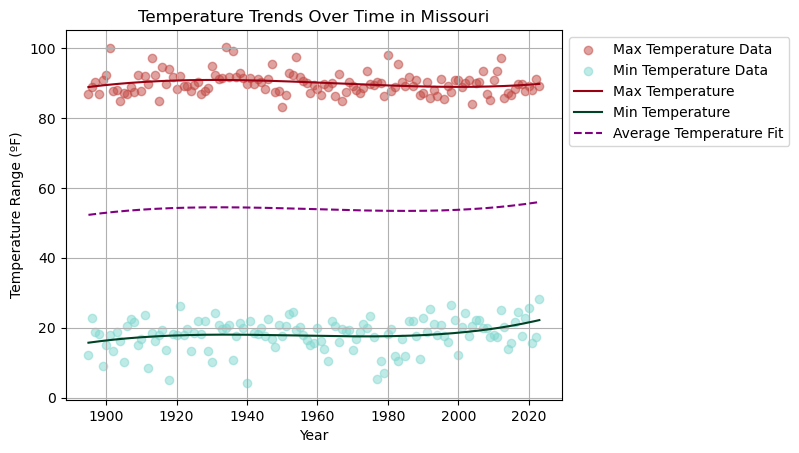

In [ ]:
def main():
    # Create a window with the US map
    win = gp.GraphWin("USA Map", 640, 480)
    get_map = USA_map(win)  # Assuming this is a function that displays the map (not defined in your code)

    # Get the user's input of the location
    user_location = coordinate_input(win)
    
    # Get the state based on the user click
    state, coords = find_state_by_click(user_location[0], user_location[1])
    
    # Filter the data for the chosen state
    choose_data = split(df, state)
    # Call the plot function with the filtered data and state
    plt_state(choose_data, state)
    
    
    #win.getMouse()  # Wait for another click to close the window
    #win.close()

    old = int(input('Enter the oldest year that you want to see'))
    new = int(input('Enter the newest year that you want to see'))
    print (old)
    print (new)
    temp_plot(old, new)

    win.getMouse()
    win.close()
    
# Run the main function
main()

## Transformation to chronological format
c_data = pd.melt(
    df,
    id_vars=['State', 'Year', 'Element Code'],
    value_vars=month_columns,
    var_name='Month',
    value_name='Temperature'
)

# Create a 'Date' column for chronological sorting
c_data['Date'] = pd.to_datetime(
    c_data['Year'].astype(int).astype(str) + '-' + c_data['Month'],
    format='%Y-%B'
)

# Sort by 'Date'
c_data = c_data.sort_values('Date').reset_index(drop=True)

# Display the result
print(c_data.head())


d_data = c_data[c_data['State'] == 'Florida']

# Filter the data for 'Max' and 'Min' temperatures
max_temp_data = d_data[d_data['Element Code'] == 'Max']
min_temp_data = d_data[d_data['Element Code'] == 'Min']

# Define X and Y for the 'Max' temperature
y_max = max_temp_data['Temperature'].values  # Convert to a NumPy array for regression
X_max = max_temp_data['Year'].values.reshape(-1, 1)

# Define X and Y for the 'Min' temperature
y_min = min_temp_data['Temperature'].values  # Convert to a NumPy array for regression
X_min = min_temp_data['Year'].values.reshape(-1, 1)

# Degree of the polynomial regression
degree = 3

# Fit polynomial regression for 'Max' temperature
poly_max = PolynomialFeatures(degree=degree)
X_max_poly = poly_max.fit_transform(X_max)
poly_reg_max = LinearRegression()
poly_reg_max.fit(X_max_poly, y_max)

# Fit polynomial regression for 'Min' temperature
poly_min = PolynomialFeatures(degree=degree)
X_min_poly = poly_min.fit_transform(X_min)
poly_reg_min = LinearRegression()
poly_reg_min.fit(X_min_poly, y_min)

# Generate a smooth range of years for plotting the curves
year_range = np.linspace(X_max.min(), X_max.max(), 500).reshape(-1, 1)
y_max_smooth = poly_reg_max.predict(poly_max.transform(year_range))
y_min_smooth = poly_reg_min.predict(poly_min.transform(year_range))

# Plot the scatter plot of temperature vs. year for both Max and Min
plt.scatter(X_max, y_max, color='red', alpha=0.5, label='Max Temperature Data')
plt.scatter(X_min, y_min, color='blue', alpha=0.5, label='Min Temperature Data')

# Plot the polynomial regression lines for both Max and Min
plt.plot(year_range, y_max_smooth, color='green', label=f'Max Temperature Fit (Degree {degree})')
plt.plot(year_range, y_min_smooth, color='orange', label=f'Min Temperature Fit (Degree {degree})')

# Title and labels
plt.title(f'Temperature Trends Over Time')
plt.ylabel('Temperature Range (ºC)')
plt.xlabel('Year')

# Display the legend
plt.legend()

# Show the plot
plt.show()

